# Rede Neural Convolucional - Classificação de imagens de Satélite

![](https://as1.ftcdn.net/v2/jpg/04/74/61/94/1000_F_474619433_0aVlKtdw2H3g6rYg4P7b2PzkKxq6IYza.jpg)

**Descrição** 

Conjunto de dados de classificação de imagem de satélite-RSI-CB256, este conjunto de dados tem 4 classes diferentes misturadas de sensores e instantâneo do mapa do google.



**Conteúdo**

Os últimos anos testemunharam um grande progresso na interpretação de imagens de sensoriamento remoto (RS) e suas amplas aplicações. Com as imagens RS se tornando mais acessíveis do que nunca, há uma demanda crescente pela interpretação automática dessas imagens. Nesse contexto, os conjuntos de dados de referência servem como pré-requisitos essenciais para desenvolver e testar algoritmos de interpretação inteligentes. Depois de revisar os conjuntos de dados de referência existentes na comunidade de pesquisa de interpretação de imagens RS, este artigo discute o problema de como preparar eficientemente um conjunto de dados de referência adequado para interpretação de imagens RS. Especificamente, primeiro analisamos os desafios atuais de desenvolver algoritmos inteligentes para interpretação de imagens RS com investigações bibliométricas. Em seguida, apresentamos a orientação geral sobre como criar conjuntos de dados de referência de maneira eficiente. Seguindo a orientação apresentada, também fornecemos um exemplo de construção de conjunto de dados de imagem RS, ou seja, Million-AID, um novo conjunto de dados de referência de grande escala contendo um milhão de instâncias para classificação de cena de imagem RS. Vários desafios e perspectivas na anotação de imagens RS são finalmente discutidos para facilitar a pesquisa na construção de conjuntos de dados de referência. Esperamos que este artigo forneça à comunidade RS uma perspectiva geral sobre a construção de conjuntos de dados de imagens práticos e em larga escala para pesquisas futuras, especialmente as baseadas em dados.


**Reconhecimentos**

Conjuntos de dados anotados para interpretação de imagens RS
A interpretação de imagens RS vem desempenhando um papel cada vez mais importante em uma grande diversidade de aplicações e, portanto, tem atraído notáveis atenções de pesquisa. Consequentemente, vários conjuntos de dados foram construídos para avançar no desenvolvimento de algoritmos de interpretação para imagens RS. Cobrindo a literatura publicada na última década, realizamos uma revisão sistemática dos conjuntos de dados de imagens RS existentes sobre o atual fluxo principal de tarefas de interpretação de imagens RS, incluindo classificação de cena, detecção de objetos, segmentação semântica e detecção de alterações.

- Aprendizado Profundo, Imagem de Satélite

In [ ]:
import cv2
import keras
import numpy as np
import tensorflow as tf 
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Versão CUDA
# NVIDIA

print("Versão Tensorflow-GPU", tf.__version__)
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU está", "disponivel" if gpu else "Não disponivel")
print()
!nvidia-smi

Versão Tensorflow-GPU 2.8.0
GPU está disponivel

Sat May 14 00:07:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.59       Driver Version: 512.59       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   44C    P8     9W / 130W |   5716MiB /  6144MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                       

In [ ]:
# Dataset - imagens
img_total = "data"

In [ ]:
# Pré-processamento dataset

data_train = tf.keras.preprocessing.image_dataset_from_directory(img_total,
                                                                image_size = (64, 64),
                                                                label_mode = "categorical",
                                                                batch_size=32,
                                                                validation_split=0.20,
                                                                seed = 42,
                                                                subset="training")
print()

data_test = tf.keras.preprocessing.image_dataset_from_directory(img_total,
                                                                image_size = (64,64),
                                                                label_mode = "categorical",
                                                                batch_size = 32,
                                                                seed = 42,
                                                                validation_split = 0.20,
                                                                subset = "validation"
                                                                )

Found 5631 files belonging to 4 classes.
Using 4505 files for training.

Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


In [ ]:
# Classes das imagens

label_classe = data_train.class_names
label_classe

['cloudy', 'desert', 'green_area', 'water']

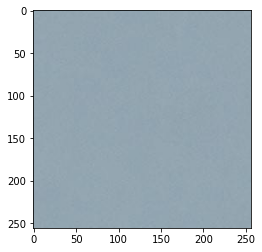

In [ ]:
imag1 = cv2.imread("/content/drive/MyDrive/Machine learning e deep learning/CNN - Projetos/Satellite Image Classification/data/desert/desert(1007) (1).jpg")
imag2 = cv2.imread("/content/drive/MyDrive/Machine learning e deep learning/CNN - Projetos/Satellite Image Classification/data/green_area/Forest_1488.jpg")
plt.imshow(imag1)

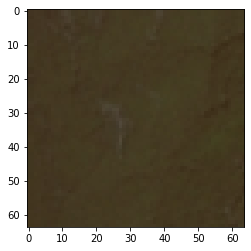

In [ ]:
plt.imshow(imag2)

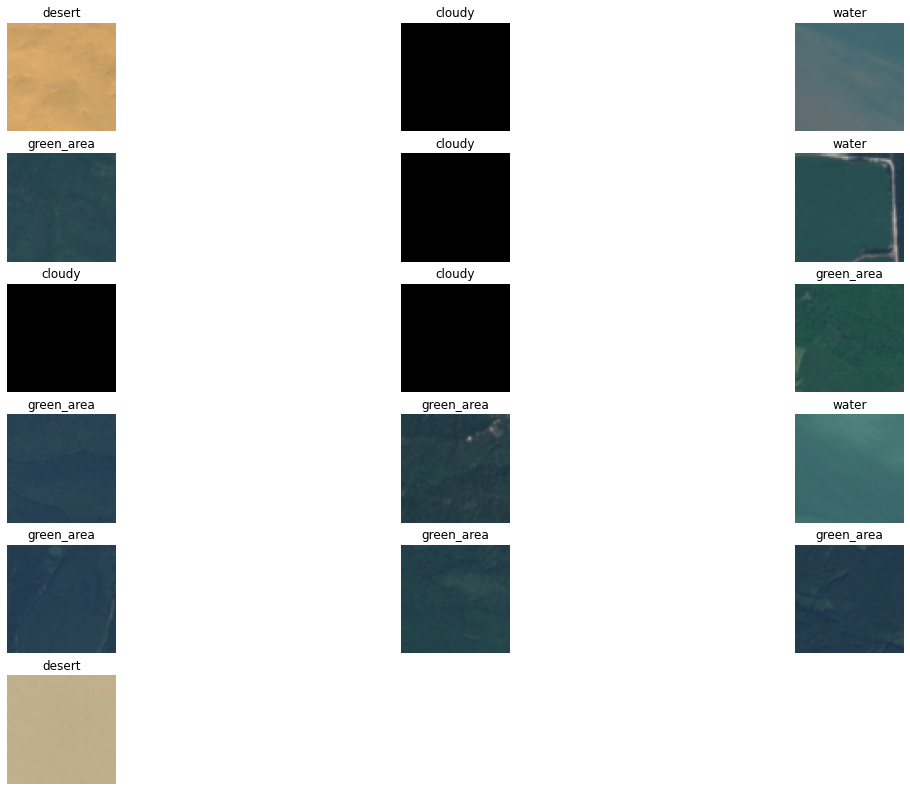

In [ ]:
# Visualizando dados de treino

plt.figure(figsize=(20,14))

for img, x in data_train.take(1):
  
  for i in range(16):
    plt.subplot(6,3,i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(label_classe[tf.argmax(x[i])]) 
    plt.axis("off")

In [ ]:
# Modelo CNN
# Rede neural pré treinada
# Um modelo de classificação de imagem Keras, opcionalmente carregado com pesos pré-treinados no ImageNet.

model_cnn = tf.keras.applications.EfficientNetB5(include_top=False)
model_cnn.trainable = False

In [ ]:
# Entrada da rede neural 

input_s = tf.keras.Input(shape=(64,64,3))

x = model_cnn(input_s)
x = layers.GlobalAveragePooling2D()(x)

output_s = layers.Dense(4, activation="softmax")(x)
model_cnn = tf.keras.Model(input_s, output_s)
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 efficientnetb5 (Functional)  (None, None, None, 2048)  28513527 
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 28,521,723
Trainable params: 8,196
Non-trainable params: 28,513,527
_________________________________________________________________


In [ ]:
# Otimizador do modelo 
model_cnn.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# Fit rede neural
model_fit_hit = model_cnn.fit(data_train,
             epochs=105,
             steps_per_epoch = len(data_train),
             validation_data = data_test,
             validation_steps = len(data_test))

Epoch 1/5
141/141 [==============================] - 40s 167ms/step - loss: 0.5460 - accuracy: 0.8122 - val_loss: 0.2774 - val_accuracy: 0.9281
Epoch 2/5
141/141 [==============================] - 13s 87ms/step - loss: 0.3003 - accuracy: 0.9094 - val_loss: 0.1968 - val_accuracy: 0.9423
Epoch 3/5
141/141 [==============================] - 11s 79ms/step - loss: 0.2447 - accuracy: 0.9232 - val_loss: 0.1654 - val_accuracy: 0.9494
Epoch 4/5
141/141 [==============================] - 13s 87ms/step - loss: 0.2016 - accuracy: 0.9418 - val_loss: 0.1311 - val_accuracy: 0.9663
Epoch 5/5
141/141 [==============================] - 16s 108ms/step - loss: 0.1736 - accuracy: 0.9483 - val_loss: 0.1247 - val_accuracy: 0.9698


In [ ]:
# Avaliação do modelo
evaluation_model = model_cnn.evaluate(data_test)

36/36 [==============================] - 3s 64ms/step - loss: 0.1247 - accuracy: 0.9698


In [ ]:
# Accuarcy CNN
print(f"Accuarcy CNN: {evaluation_model[1] * 100 : 0.2f} %")

Accuarcy CNN:  96.98 %


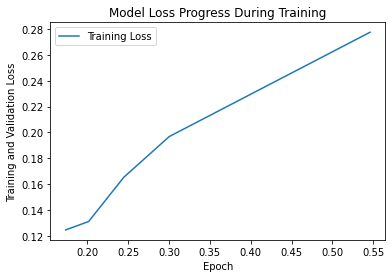

In [ ]:
# Avaliação do modelo
plt.plot(model_fit_hit.history['loss'], model_fit_hit.history["val_loss"])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

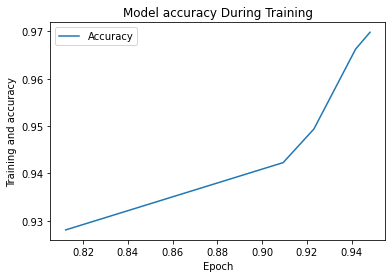

In [ ]:
plt.plot(model_fit_hit.history['accuracy'], model_fit_hit.history["val_accuracy"])
plt.title('Model accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and accuracy')
plt.legend(['Accuracy', "val_accuracy"]);

In [ ]:
# Previsão das imagens com dados test
img_pred = model_cnn.predict(data_test)
img_pred

array([[1.66885415e-03, 1.19041614e-02, 8.78839195e-01, 1.07587755e-01],
       [1.81484059e-03, 3.11067537e-03, 9.26432908e-01, 6.86416104e-02],
       [3.83951096e-03, 8.28541458e-01, 1.17122896e-01, 5.04961871e-02],
       ...,
       [5.44057002e-05, 9.53370392e-01, 1.90935507e-02, 2.74816379e-02],
       [3.21106345e-04, 3.98697965e-02, 8.88852179e-01, 7.09568560e-02],
       [1.46425506e-02, 1.79927226e-03, 5.37104264e-04, 9.83021140e-01]],
      dtype=float32)

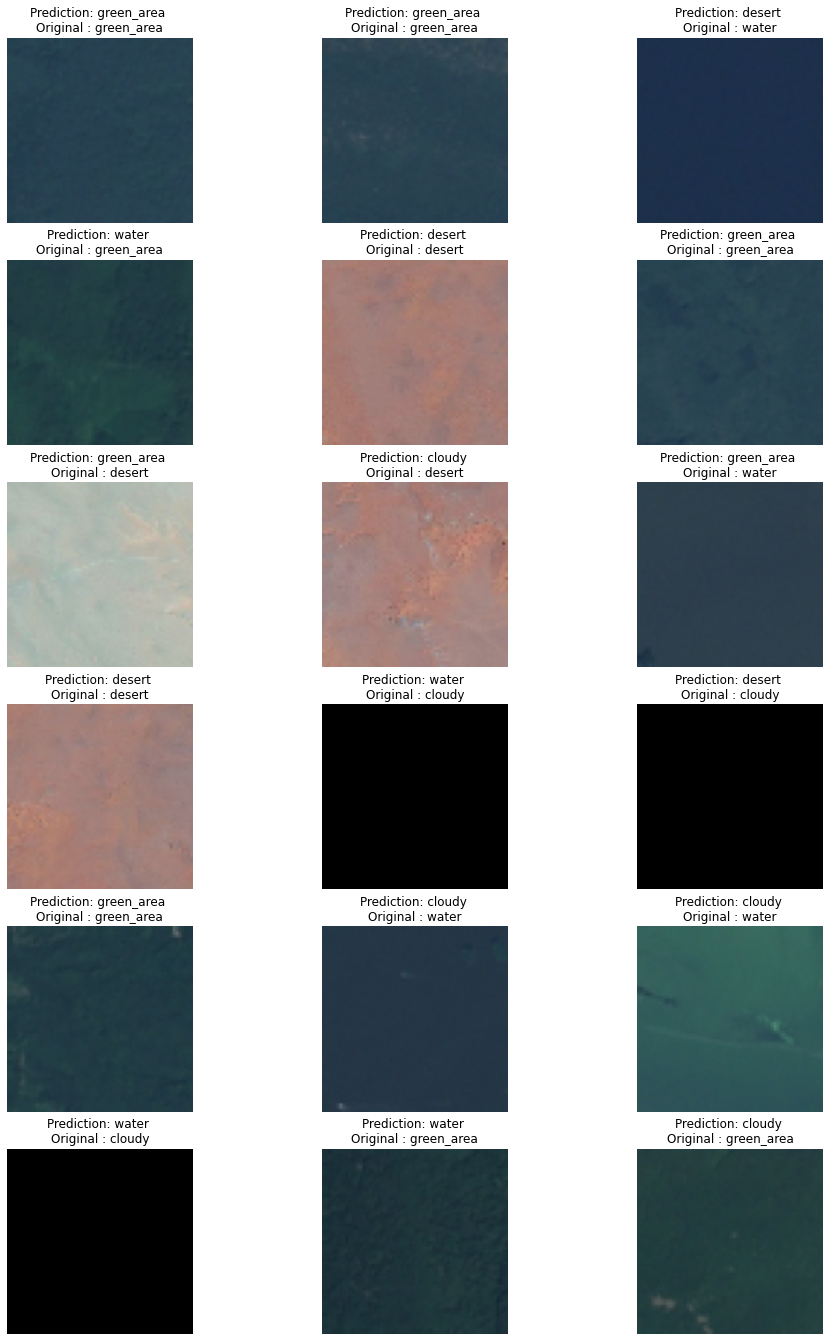

In [ ]:
# Previsão das imagens 

plt.figure(figsize=(16,16))

for img, x in data_test.take(1):
  for i in range(18):
    plt.subplot(6,3,i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(f"Prediction: {label_classe[tf.argmax(img_pred[i])]} \nOriginal : {label_classe[tf.argmax(x[i])]}")
    plt.subplots_adjust(top = 1.25)
    plt.axis("off")

# **Rede neural segundo modelo**

In [ ]:
# Modelo 02

# Treinamento do modelo
model_cnn.trainable = True
for layer in model_cnn.layers[:-3]:
  model_cnn.trainable = False

# Compilando modelo
model_cnn.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"])

# Súmario da CNN
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 efficientnetb5 (Functional)  (None, None, None, 2048)  28513527 
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 28,521,723
Trainable params: 0
Non-trainable params: 28,521,723
_________________________________________________________________


In [ ]:
# Rodando rede neural
model_fit_hist2 = model_cnn.fit(
    data_train,
    epochs = 105,
    steps_per_epoch = len(data_train),
    validation_data = data_test,
    validation_steps = len(data_test))

Epoch 1/5
141/141 [==============================] - 32s 121ms/step - loss: 0.1678 - accuracy: 0.9523 - val_loss: 0.1247 - val_accuracy: 0.9698
Epoch 2/5
141/141 [==============================] - 11s 77ms/step - loss: 0.1721 - accuracy: 0.9489 - val_loss: 0.1247 - val_accuracy: 0.9698
Epoch 3/5
141/141 [==============================] - 12s 83ms/step - loss: 0.1690 - accuracy: 0.9483 - val_loss: 0.1247 - val_accuracy: 0.9698
Epoch 4/5
141/141 [==============================] - 14s 97ms/step - loss: 0.1709 - accuracy: 0.9452 - val_loss: 0.1247 - val_accuracy: 0.9698
Epoch 5/5
141/141 [==============================] - 11s 77ms/step - loss: 0.1721 - accuracy: 0.9509 - val_loss: 0.1247 - val_accuracy: 0.9698


In [ ]:
# Previsão das imagens com dados test
img_pred2 = model_cnn.predict(data_test)
img_pred2

array([[2.2125407e-08, 9.9879462e-06, 3.3882802e-06, 9.9998665e-01],
       [3.4634975e-01, 1.1400074e-02, 5.4555970e-01, 9.6690431e-02],
       [4.7342587e-04, 1.0925493e-02, 8.7275755e-01, 1.1584350e-01],
       ...,
       [2.7825832e-04, 3.8786058e-03, 7.6120114e-01, 2.3464197e-01],
       [3.5179619e-02, 3.7796223e-01, 2.7156597e-01, 3.1529215e-01],
       [7.5432559e-04, 7.6060514e-03, 4.3366999e-05, 9.9159628e-01]],
      dtype=float32)

In [ ]:
# Avaliação do modelo
evaluation_model2 = model_cnn.evaluate(data_test)
evaluation_model2

36/36 [==============================] - 2s 57ms/step - loss: 0.1247 - accuracy: 0.9698


[0.12465391308069229, 0.9698046445846558]

In [ ]:
# Accuarcy CNN
print(f"Accuarcy CNN 2: {evaluation_model2[1] * 100 : 0.2f} %")

Accuarcy CNN 2:  96.98 %


In [ ]:
# Previsão das imagens com dados test
img_pred2 = model_cnn.predict(data_test)
img_pred2

array([[2.3675342e-04, 2.9027132e-02, 9.1140717e-01, 5.9328932e-02],
       [5.4077141e-04, 9.5823276e-01, 2.8495762e-02, 1.2730740e-02],
       [1.5070946e-03, 9.6721143e-01, 2.9189376e-02, 2.0921621e-03],
       ...,
       [9.8991770e-01, 1.1198929e-05, 4.7482090e-04, 9.5962854e-03],
       [2.5785150e-06, 5.2253120e-03, 4.8832539e-03, 9.8988885e-01],
       [9.5363446e-03, 2.1761956e-03, 3.1907402e-04, 9.8796844e-01]],
      dtype=float32)

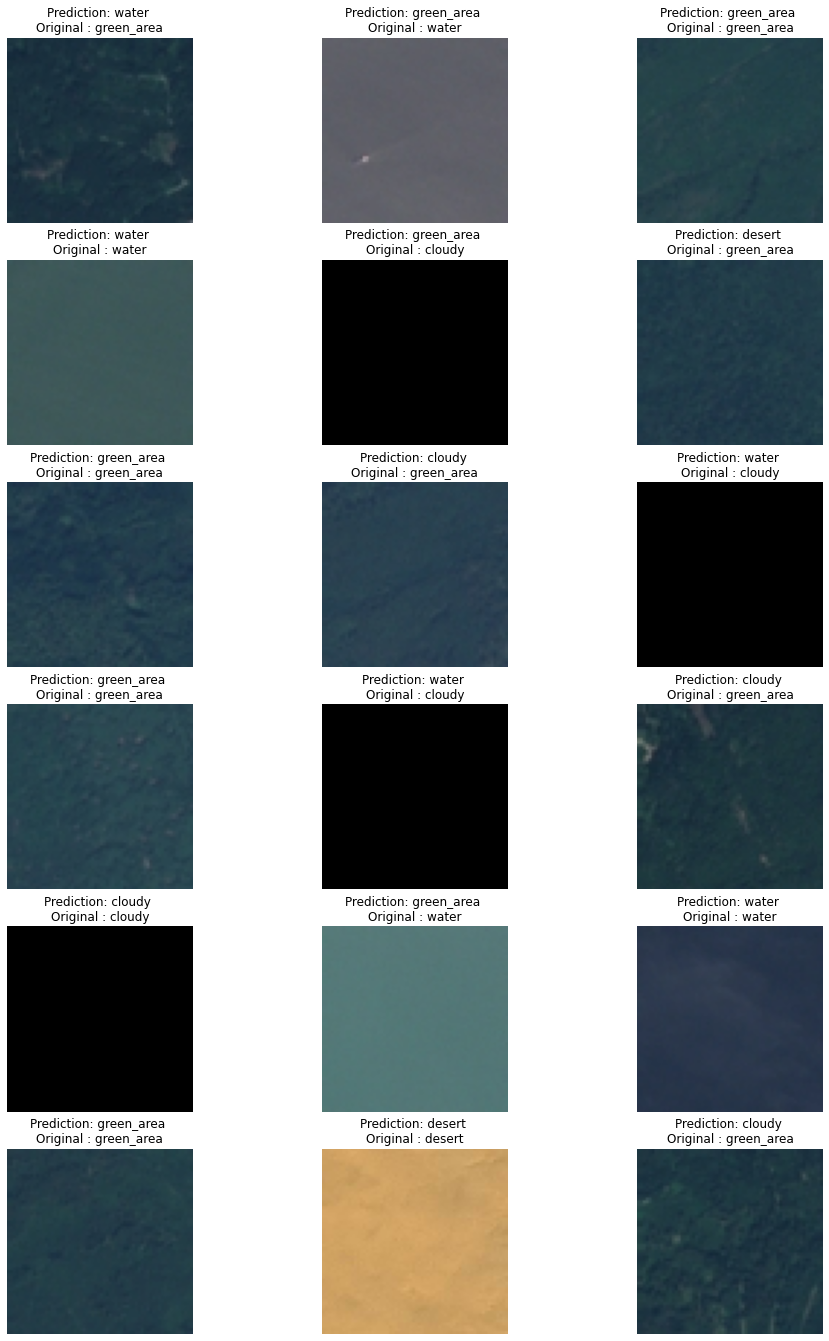

In [ ]:
# Previsão das imagens geral
plt.figure(figsize=(16,16))

for image, label in data_test.take(1):
  for i in range(18):
    plt.subplot(6,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(f"Prediction: {label_classe[tf.argmax(img_pred2[i])]} \nOriginal : {label_classe[tf.argmax(label[i])]}")
    plt.subplots_adjust(top = 1.25)
    plt.axis("off")

In [ ]:
# Salvando modelo CNN
CNN = model_cnn.save('satelite_imgens_CNN.h5')
CNN